In [21]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data cleaning

In [22]:
# read csv data
df = pd.read_csv('csv/data.csv')

# Drop duplicate rows
df = df.drop_duplicates()

# Delete rows where sex_of_casualty column has values other than 1 or 2
df = df[(df['sex_of_casualty'] == 1) | (df['sex_of_casualty'] == 2)]

# Exclude rows from the DataFrame where the 'vehicle_reference' column is either 227 or 61.
df = df[(df['vehicle_reference'] != 227) & (df['vehicle_reference'] != 61)]

# The 'car_passenger' column should only contain the values [-1, 0, 1, 2].
df = df[df['car_passenger'].isin([-1, 0, 1, 2, 9])]

# General information about dataset

### How many accidents exist in this dataset?

In [23]:
# Get the shape of the dataset
dataset_shape = df.shape
print("Shape of the dataset (rows, columns):", dataset_shape)

# Count the number of unique values in the 'accident_index' column
unique_accident_index_count = df['accident_index'].nunique()
print("Number of unique values in the 'accident_index' column:", unique_accident_index_count)

Shape of the dataset (rows, columns): (60892, 20)
Number of unique values in the 'accident_index' column: 48078


### Which class of casualty experiences the highest number of accidents?

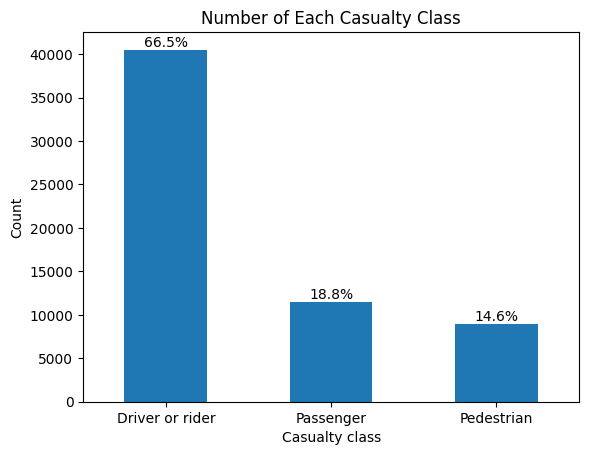

In [24]:
# Plot the number of occurrences of each class in the 'casualty_class' column
class_counts = df['casualty_class'].value_counts()

# Calculate the percentage of each class
total = class_counts.sum()
percentages = (class_counts / total) * 100

# Define the names of the bars
bar_names = ['Driver or rider', 'Passenger', 'Pedestrian']

# Plot the bar chart
ax = class_counts.plot(kind='bar')
plt.xlabel('Casualty class')
plt.ylabel('Count')
plt.title('Number of Each Casualty Class')

# Set the names of the bars
plt.xticks(range(len(bar_names)), bar_names, rotation=0)

# Annotate the bars with percentages
for i, v in enumerate(class_counts):
    ax.text(i, v + 1, f'{percentages[i+1]:.1f}%', ha='center', va='bottom')

plt.show()

### Percentage of casualties by different types.

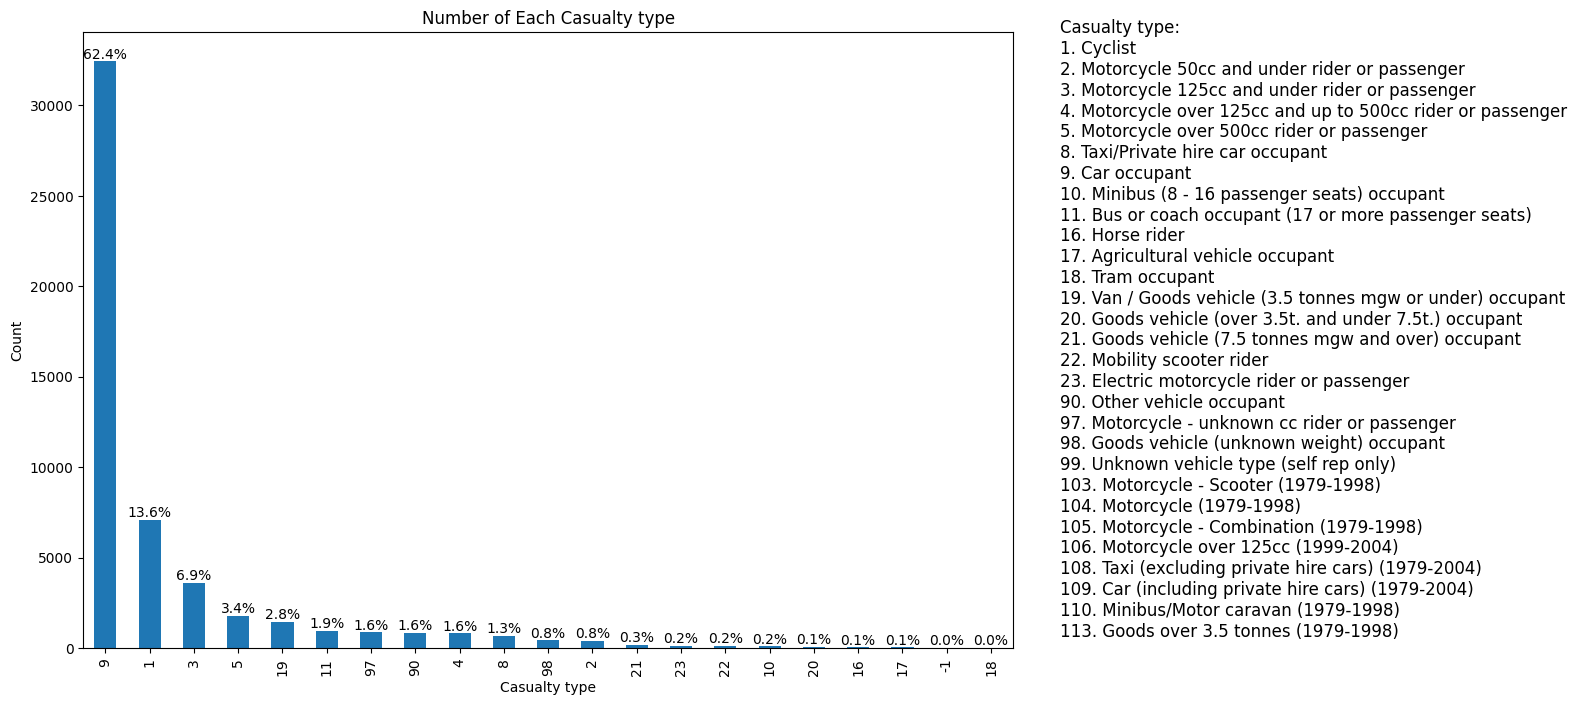

In [25]:
# Plot the number of occurrences of each type of the 'casualty_type' column
class_counts = df[df['casualty_type'] != -1]['casualty_type'].value_counts()
class_counts = df[df['casualty_type'] != 0]['casualty_type'].value_counts()

# Calculate the percentage of each class
total = class_counts.sum()
percentages = (class_counts / total) * 100

# Define the names of the bars
# bar_names = ['Driver or rider', 'Passenger', 'Pedestrian']

# Plot the bar chart
plt.figure(figsize=(12, 8))
ax = class_counts.plot(kind='bar')
plt.xlabel('Casualty type')
plt.ylabel('Count')
plt.title('Number of Each Casualty type')

# Set the names of the bars
text = "Casualty type:\n" \
    + "1. Cyclist\n" \
    + "2. Motorcycle 50cc and under rider or passenger\n" \
    + "3. Motorcycle 125cc and under rider or passenger\n" \
    + "4. Motorcycle over 125cc and up to 500cc rider or passenger\n" \
    + "5. Motorcycle over 500cc rider or passenger\n" \
    + "8. Taxi/Private hire car occupant\n" \
    + "9. Car occupant\n" \
    + "10. Minibus (8 - 16 passenger seats) occupant\n" \
    + "11. Bus or coach occupant (17 or more passenger seats)\n" \
    + "16. Horse rider\n" \
    + "17. Agricultural vehicle occupant\n" \
    + "18. Tram occupant\n" \
    + "19. Van / Goods vehicle (3.5 tonnes mgw or under) occupant\n" \
    + "20. Goods vehicle (over 3.5t. and under 7.5t.) occupant\n" \
    + "21. Goods vehicle (7.5 tonnes mgw and over) occupant\n" \
    + "22. Mobility scooter rider\n" \
    + "23. Electric motorcycle rider or passenger\n" \
    + "90. Other vehicle occupant\n" \
    + "97. Motorcycle - unknown cc rider or passenger\n" \
    + "98. Goods vehicle (unknown weight) occupant\n" \
    + "99. Unknown vehicle type (self rep only)\n" \
    + "103. Motorcycle - Scooter (1979-1998)\n" \
    + "104. Motorcycle (1979-1998)\n" \
    + "105. Motorcycle - Combination (1979-1998)\n" \
    + "106. Motorcycle over 125cc (1999-2004)\n" \
    + "108. Taxi (excluding private hire cars) (1979-2004)\n" \
    + "109. Car (including private hire cars) (1979-2004)\n" \
    + "110. Minibus/Motor caravan (1979-1998)\n" \
    + "113. Goods over 3.5 tonnes (1979-1998)\n"

plt.text(1.05, 0.5, text, fontsize=12, transform=plt.gca().transAxes, va='center')


# Annotate the bars with percentages
for i, v in enumerate(class_counts):
    ax.text(i, v + 1, f'{percentages[percentages.index[i]]:.1f}%', ha='center', va='bottom')

plt.show()

### Which gender experiences the highest number of accidents?

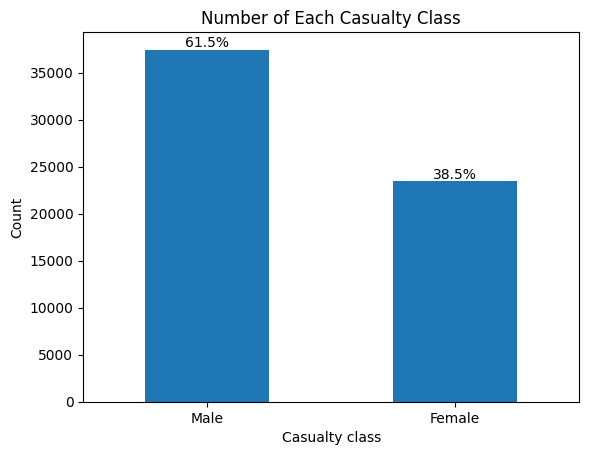

In [26]:
# Plot the number of occurrences of each class in the 'sex_of_casualty' column
class_counts = df['sex_of_casualty'].value_counts()

# Calculate the percentage of each class
total = class_counts.sum()
percentages = (class_counts / total) * 100

# Define the names of the bars
bar_names = ['Male', 'Female']

# Plot the bar chart
ax = class_counts.plot(kind='bar')
plt.xlabel('Casualty class')
plt.ylabel('Count')
plt.title('Number of Each Casualty Class')

# Set the names of the bars
plt.xticks(range(len(bar_names)), bar_names, rotation=0)

# Annotate the bars with percentages
for i, v in enumerate(class_counts):
    ax.text(i, v + 1, f'{percentages[i+1]:.1f}%', ha='center', va='bottom')

plt.show()

### The distribution of the age of casualties.

Number of occurrences of -1 in 'age_of_casualty' column: 1068
Number of occurrences of different values in 'age_of_casualty' column:  102
Maximum count of occurrences of a unique age: 1595
Age(s) with the maximum count: 18


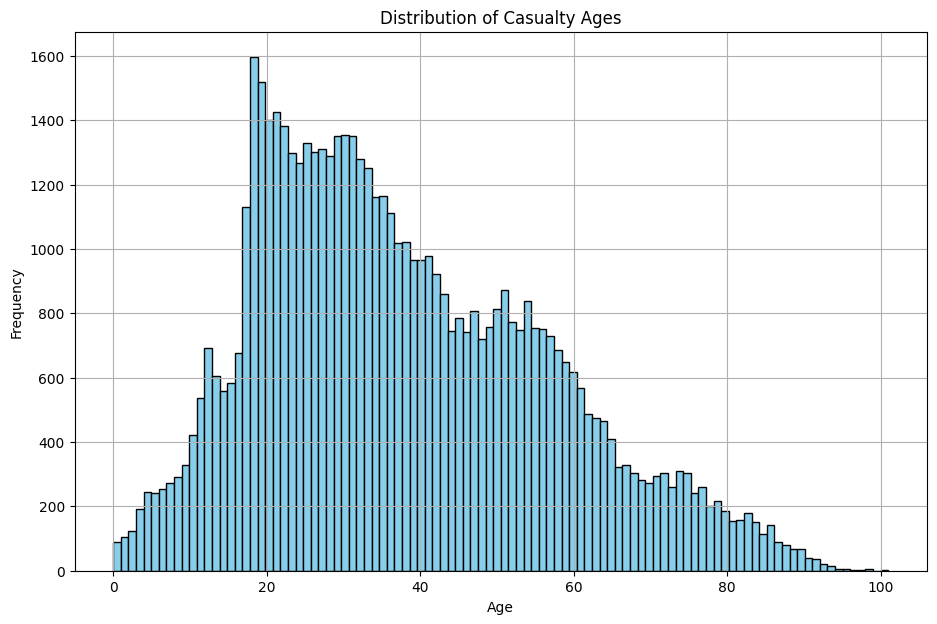

In [27]:
num_minus_one = (df['age_of_casualty'] == -1).sum()
print("Number of occurrences of -1 in 'age_of_casualty' column:", num_minus_one)

age_counts = df['age_of_casualty'].value_counts()
print("Number of occurrences of different values in 'age_of_casualty' column: ", len(age_counts))

max_count = age_counts.max()
ages_with_max_count = age_counts[age_counts == max_count].index.tolist()
print("Maximum count of occurrences of a unique age:", max_count)
print("Age(s) with the maximum count:", ages_with_max_count[0])

# Filter out the -1 values from the 'age_of_casualty' column
filtered_age = df[df['age_of_casualty'] != -1]['age_of_casualty']

# Plot the histogram of ages
plt.figure(figsize=(11, 7))
plt.hist(filtered_age, bins=102, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Casualty Ages')
plt.grid(True)
plt.show()

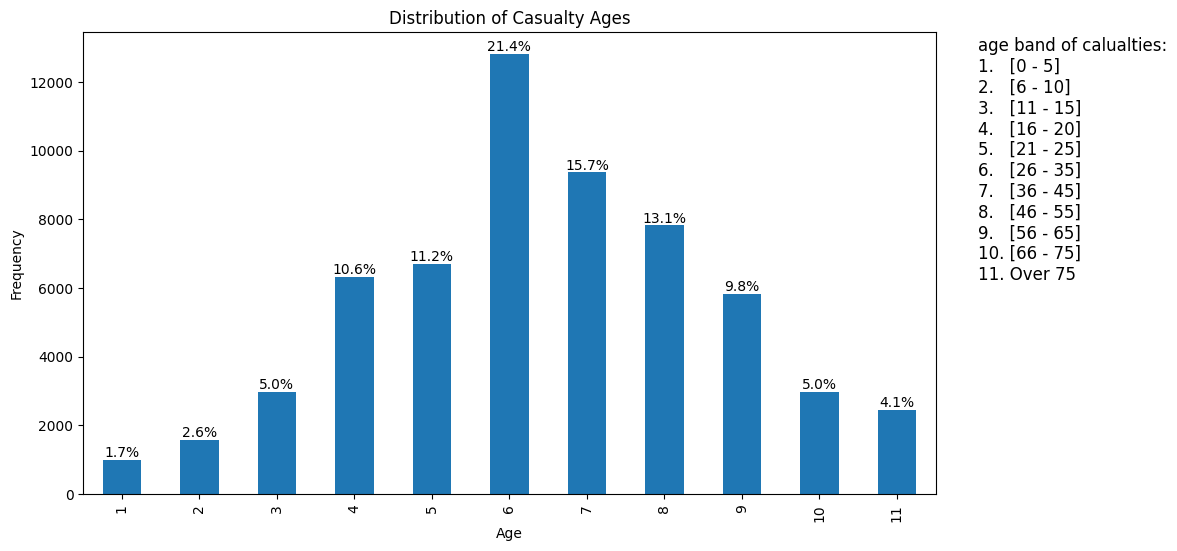

In [28]:
# Filter out the -1 values from the 'age_band_of_casualty' column
class_counts = df[df['age_band_of_casualty'] != -1]['age_band_of_casualty'].value_counts().sort_index()

# Calculate the percentage of each class
total = class_counts.sum()
percentages = (class_counts / total) * 100

# Plot the bar chart
plt.figure(figsize=(11, 6))
ax = class_counts.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Casualty Ages')

# Annotate the bars with percentages
for i, v in enumerate(class_counts):
    ax.text(i, v + 1, f'{percentages[percentages.index[i]]:.1f}%', ha='center', va='bottom')

text = "age band of calualties:\n"\
        + "1.   [0 - 5]\n2.   [6 - 10]\n3.   [11 - 15]\n4.   [16 - 20]\n5.   [21 - 25]\n6.   [26 - 35]\n7.   [36 - 45]\n8.   [46 - 55]\n" \
        "9.   [56 - 65]\n10. [66 - 75]\n11. Over 75\n"
plt.text(1.05, 0.7, text, fontsize=12, transform=plt.gca().transAxes, va='center')

plt.show()